# Mezcal drops classifier
fastai image classifier of custom mezcal drop images
 
Inspired by  

*   [PyTorch Beginner Tutorial - Training an Image Classification Model and putting it online!
](https://www.youtube.com/watch?v=k1GIEkzQ8qc)
*   [Building projects with fastai - From Model Training to Deployment
](https://www.youtube.com/watch?v=pNaCrhxmN1w)

THIS VERSION IS MOSTLY BASED OFF OF THIS:
* [Image Classification with a Custom Dataset](https://walkwithfastai.com/Custom)

### Attempt #6(?) - 2022-02-27


In [1]:
#!pip install -Uqq fastbook

import fastbook

In [2]:
import fastai
from fastai.vision.widgets import *
from fastbook import *
import zipfile
import os
import datetime

In [34]:
def save_model(learner, title):
    now = datetime.datetime.now()
    timestamp = str(now.strftime("%Y%m%d_%H-%M-%S"))
    
    fname = f'{title}-{timestamp}'
    learner.save(fname)
    return fname

In [2]:
# uncomment when in Colab
"""
# new path with renamed dataset
path_to_zip_file = "data22.zip"
directory_to_extract_to = "data"

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
"""

In [3]:
path = Path("data")
files = get_image_files(path)
files

(#142) [Path('data/cuishe/cuishe_20210415145251.jpg'),Path('data/cuishe/cuishe_20210415145304.jpg'),Path('data/cuishe/cuishe_20210415145307.jpg'),Path('data/cuishe/cuishe_20210415145322.jpg'),Path('data/cuishe/cuishe_20210415145326.jpg'),Path('data/cuishe/cuishe_20210415145511.jpg'),Path('data/cuishe/cuishe_20210415145549.jpg'),Path('data/cuishe/cuishe_20210415145551.jpg'),Path('data/cuishe/cuishe_20210415145555.jpg'),Path('data/cuishe/cuishe_20210415145644.jpg')...]

### Delete any corrupt images

In [4]:
classes = os.listdir("data")

imgs = L()
for n in classes:
    print(n)
    path_n = path/n
    imgs += verify_images(path_n.ls())

cuishe
espadin
pechuga
tepextate
tobala


In [5]:
imgs

(#0) []

### View Data

In [6]:
mezcal = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(0.2),
                  get_y=parent_label,
                  item_tfms=RandomResizedCrop(460),
                  batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [7]:
dls = mezcal.dataloaders(path,  bs=9)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


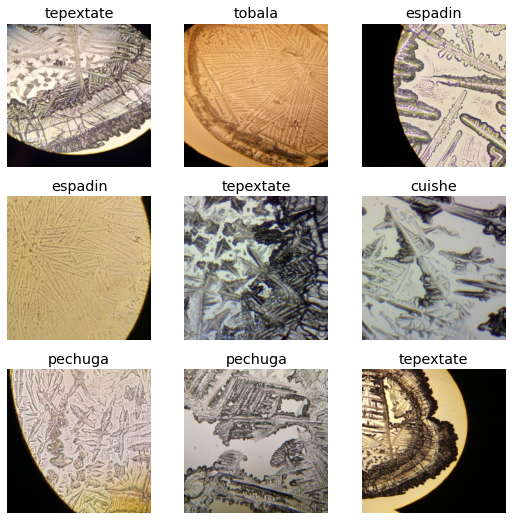

In [8]:
dls.show_batch(max_n=9)

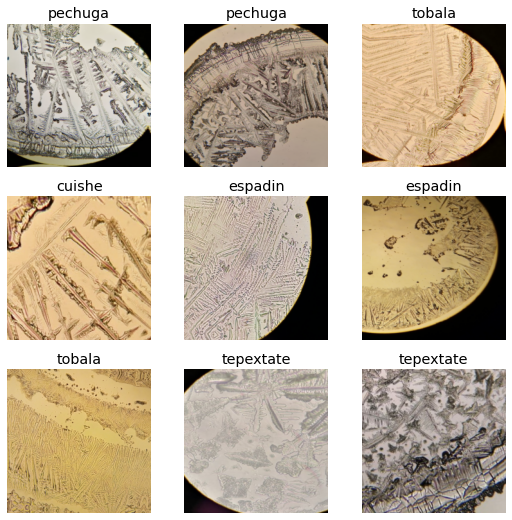

In [13]:
dls.train.show_batch()

In [9]:
dls.vocab

['cuishe', 'espadin', 'pechuga', 'tepextate', 'tobala']

## Training

In [19]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()

In [20]:
learn.fine_tune(10)

C:\Users\socd0\anaconda3\lib\site-packages\torch\cuda\amp\grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,error_rate,time
0,2.533218,1.985118,0.714286,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.405489,1.634028,0.642857,00:36
1,2.066199,1.181625,0.500000,00:37
2,1.829046,0.878263,0.285714,00:34
3,1.569204,0.723529,0.321429,00:34
4,1.407838,0.633151,0.285714,00:34
5,1.267828,0.570289,0.214286,00:34
6,1.166981,0.329568,0.142857,00:34
7,1.145014,0.336639,0.107143,00:35
8,1.032219,0.354300,0.107143,00:35
9,0.968080,0.350225,0.107143,00:34


In [36]:
model = save_model(learn, "added_data")

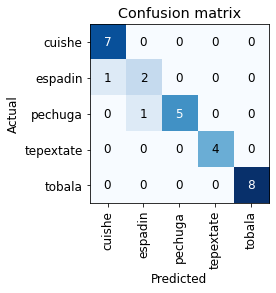

In [37]:
learn.load(model);
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

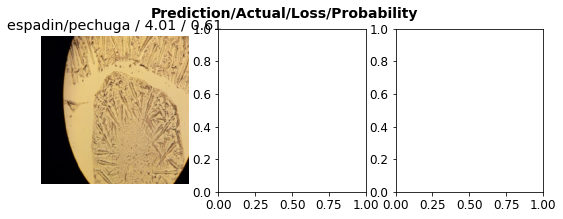

In [38]:
interp.plot_top_losses(3)